This notebook is part of the classification study by Patrick McCauley and Virginia Frey and was prepared within the scope of an assignment for the COMP5318 course (Machine Learning and Data Mining) taught by Fabio Ramos and Roman Marchant at the University of Sydney in 2018.

# Comparative classification accuracies on the covertype dataset

This notebook contains the numeric analysis and tests that were performed within the scope of this work. Here we tune and compare the performance of three different classifiers: Gaussian Naive Bayes, Multilayer Perceptron (MLP) and a Random Forest. The notebook displays all results obtained within this study.

To run it, simply execute the cells from top to bottom. Note that the MLP code section defaults to loading previously saved results, rather than performing the optimisation routine from scratch.

In [1]:
from __future__ import print_function, division
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import naive_bayes as nb
from sklearn import neural_network as nn
from sklearn.ensemble import RandomForestClassifier

from IPython.core.display import display
from pathlib import Path

#imports code from our codes/ directory
import codes as c

<h2>Naive Bayes Classification Results</h2>

The following two cells perform a 10-fold cross validation using the Gaussian Naive Bayes classifier in scikit-learn and displays the results. 

In [2]:
def covtype_naive_bayes(kfold=10, style='prop', engineer=True):
    '''
    Name:
        covtype_naive_bayes
    
    Purpose: 
        Wrapper for Naive Bayes classifier 
    
    Parameters: 
        No Required Inputs: Data will be (re)read automatically 
        
        2 Optional Settings:
        
        crop = Boolean, default=False. Set to only keep the first 10 columns
                 of X, which encode the most information
                 
        stype = String, options are ['prop', 'random', 'equal']
                 
        engineer = Boolean, default=True. Use feature engineering pre-processing 
        to add additional features and compress binary features 
    
    Returns: 
        3 Ouputs: 
        
        df_total = Pandas DataFrame containing the average metrics (accuracy, 
                    F1, precision, recall) over the cross validation cycles
        df_class = Pandas DataFrame containing the average cross validation 
                    metrics for each separate class (f1, precision, recall)
        df_conf = Pandas DataFrame containing the average confusion matrix 
                    across the cross validation cycles
        
    ''' 
    
    #read data
    X, y, cnames, cnums = c.read_covtype(engineer=engineer)
    
    #define classifier
    _classifier = nb.GaussianNB
    
    #pass classifier object, data, and labels to cross validator from evaluations.py
    confs, runs, _ = c.cross_validate_classifier(_classifier, X, y, kfold=kfold, style=style)
    
    #average the confusion matrices
    conf = np.mean(confs, axis=0)
    
    #average runtime
    run = np.mean(runs)
    
    #calculate performance metrics, format into datatables, and display
    df_total, df_class, df_conf = c.metrics_wrapper(conf, cnames, runtime=run, do_display=True)
        
    return df_total, df_class, df_conf
    

In [3]:
#classify and display results
df_total, df_class, df_conf = covtype_naive_bayes(kfold=10, engineer=True)

Average/overall metrics:


,Avg Runtime,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
Class-Averaged or Overall:,0.806967,0.4,0.38,0.58,0.52


Class-specific metrics:


,Class,F-Meas,Precision,Recall
Confusion Matrix Index,,,,
0,Spruce/Fir,0.61,0.54,0.69
1,Lodgepole Pine,0.5,0.74,0.38
2,Ponderosa Pine,0.59,0.59,0.59
3,Cottonwood/Willow,0.26,0.15,0.95
4,Aspen,0.16,0.1,0.38
5,Douglas-fir,0.22,0.17,0.3
6,Krummholz,0.47,0.34,0.79


Confusion matrix (yellow = col max; blue = row max):


Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,14585.5,3285.5,14.8,0,566.9,202.1,2529.2
1,11889.6,10693.1,763.5,47.6,2397,1900.1,640.1
2,0.2,53.8,2123.5,1019.1,105.3,273.1,0
3,0,0,9.9,261.2,0,3.9,0
4,55.4,289.7,81.9,0,362.1,159.9,0
5,4.2,118.1,617,431.1,43.4,523.2,0
6,417.9,3.1,5.7,0,3.4,0,1620.9


<h2>Multi-Layer Perceptron (MLP) Hyperparameter Exploration</h2>

The following cell explores the MLP hyperparameters implemented in scikit-learn by varying each of them over some range while keeping the rest as their default values. The results for each parameter are written to separate csv files and read from there upon subsequent calls (unless redo=True) because of the large run times. The associated code can be found in codes/mlp_explorer.py.

In [4]:
#read data
X, y, cnames, cnums = c.read_covtype(engineer=False)
#split into training and test sets, regularise
X_train, y_train, X_test, y_test = c.split_dataset(X,y,regularize=True)

#obtain parameter exploration results tables
tables, param_titles = c.mlp_explore_params(X_train, y_train, X_test, y_test, redo=False)

#obtain "best" values for each parameter and display results
print('')
best = c.mlp_hyper_awesome(tables, param_titles, do_display=True)

Reading existing results from mlp_explore_hidden_layer_sizes_width.csv
Reading existing results from mlp_explore_hidden_layer_sizes_depth.csv
Reading existing results from mlp_explore_activation.csv
Reading existing results from mlp_explore_alpha.csv
Reading existing results from mlp_explore_batch_size.csv
Reading existing results from mlp_explore_momentum.csv
Reading existing results from mlp_explore_learning_rate_init_constant.csv
Reading existing results from mlp_explore_learning_rate_init_invscaling.csv
Reading existing results from mlp_explore_learning_rate_init_adaptive.csv
Reading existing results from mlp_explore_shuffle.csv
Reading existing results from mlp_explore_nesterovs_momentum.csv
Reading existing results from mlp_explore_power_t.csv
Reading existing results from mlp_explore_tol_constant.csv
Reading existing results from mlp_explore_tol_invscaling.csv
Reading existing results from mlp_explore_tol_adaptive.csv


"Best" value = [1000] for param = Single Hidden Layer (Widt

,hidden_layer_sizes,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1,4.71715,0.996071,5,0.18,0.17,0.2,0.6
1,2,26.4291,0.709037,27,0.38,0.41,0.4,0.71
2,3,14.7004,0.710617,14,0.34,0.41,0.36,0.71
3,4,19.6812,0.65746,19,0.41,0.45,0.43,0.72
4,5,15.7901,0.652057,12,0.41,0.46,0.43,0.73
5,6,23.0706,0.639999,15,0.43,0.47,0.44,0.73
6,7,18.7216,0.629666,13,0.44,0.48,0.44,0.74
7,8,40.7661,0.607699,31,0.47,0.59,0.46,0.74
8,9,37.8995,0.599644,29,0.5,0.65,0.49,0.74
9,10,43.8272,0.586098,32,0.52,0.7,0.49,0.75



"Best" value = ['[100, 100, 100]'] for param = Multiple Hidden Layers (Depth)


,hidden_layer_sizes,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,[100],181.774,0.425178,60,0.69,0.77,0.65,0.83
1,"[100, 100]",207.346,0.37552,37,0.72,0.8,0.68,0.84
2,"[100, 100, 100]",253.366,0.327365,31,0.75,0.8,0.72,0.86
3,"[100, 100, 100, 100]",264.145,0.3238,25,0.75,0.81,0.71,0.86
4,"[100, 100, 100, 100, 100]",124.826,0.414679,10,0.66,0.76,0.62,0.81



"Best" value = ['tanh'] for param = Activation Function


,activation,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,identity,19.9921,0.636018,9,0.49,0.57,0.48,0.72
1,logistic,389.6,0.511144,138,0.6,0.72,0.57,0.78
2,tanh,284.749,0.390859,93,0.73,0.8,0.68,0.84
3,relu,205.431,0.420116,70,0.7,0.78,0.66,0.83



"Best" value = [1.e-05] for param = Alpha (L2 Penalty)


,alpha,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1e-06,255.23,0.404065,80,0.71,0.79,0.67,0.83
1,5e-06,207.298,0.419526,67,0.69,0.78,0.64,0.83
2,1e-05,353.098,0.378021,119,0.74,0.8,0.71,0.85
3,5e-05,135.691,0.451277,45,0.66,0.76,0.62,0.81
4,0.0001,202.692,0.419221,69,0.7,0.78,0.66,0.83
5,0.0005,220.663,0.417998,74,0.69,0.78,0.66,0.83
6,0.001,173.797,0.435759,58,0.68,0.77,0.64,0.82
7,0.005,208.028,0.422282,70,0.7,0.79,0.66,0.83
8,0.01,162.276,0.444854,55,0.68,0.76,0.64,0.82
9,0.05,206.153,0.463443,69,0.68,0.75,0.65,0.82



"Best" value = [100] for param = Mini Batch Size


,batch_size,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,10,256.119,0.403205,17,0.75,0.78,0.73,0.83
1,50,112.98,0.412581,23,0.69,0.77,0.65,0.82
2,100,129.685,0.410432,39,0.71,0.77,0.67,0.83
3,500,317.477,0.428576,140,0.68,0.75,0.64,0.82
4,1000,234.87,0.505575,109,0.61,0.73,0.58,0.78
5,5000,328.22,0.585946,150,0.54,0.66,0.51,0.75
6,10000,240.266,0.641078,106,0.45,0.58,0.45,0.73
7,50000,432.454,0.701637,176,0.4,0.44,0.41,0.72
8,100000,507.495,0.741914,200,0.38,0.43,0.39,0.7



"Best" value = [0.99] for param = Momentum


,momentum,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,0.01,477.408,0.526691,144,0.59,0.7,0.56,0.78
1,0.03,318.161,0.548998,109,0.56,0.67,0.53,0.77
2,0.05,397.082,0.532404,135,0.59,0.71,0.55,0.77
3,0.07,382.823,0.535173,126,0.59,0.71,0.56,0.77
4,0.09,432.673,0.530249,144,0.59,0.7,0.56,0.77
5,0.11,280.75,0.54604,95,0.57,0.69,0.54,0.77
6,0.13,390.086,0.531713,122,0.59,0.71,0.56,0.78
7,0.15,333.01,0.542375,110,0.58,0.7,0.55,0.77
8,0.17,243.786,0.55671,79,0.57,0.7,0.54,0.76
9,0.19,344.981,0.536977,117,0.59,0.7,0.56,0.77



"Best" value = [0.005] for param = Initial Learning Rate (Rate = Constant)


,learning_rate_init,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1e-05,318.888,0.676339,109,0.42,0.56,0.43,0.72
1,5e-05,402.187,0.577155,137,0.56,0.68,0.52,0.75
2,0.0001,393.795,0.535097,140,0.59,0.7,0.56,0.77
3,0.0005,288.379,0.438278,102,0.68,0.77,0.64,0.82
4,0.001,140.502,0.441402,50,0.66,0.76,0.62,0.81
5,0.005,83.5311,0.389008,30,0.69,0.8,0.65,0.84
6,0.01,50.6411,0.40527,18,0.68,0.79,0.63,0.83
7,0.05,14.2906,0.440352,5,0.64,0.79,0.61,0.79
8,0.1,16.7617,0.442782,6,0.71,0.75,0.69,0.81
9,0.5,30.7693,0.507072,13,0.64,0.67,0.63,0.79



"Best" value = [0.1] for param = Initial Learning Rate (Rate = Inverse Scaling)


,learning_rate_init,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1e-05,19.9899,1.55777,7,0.17,0.19,0.18,0.42
1,5e-05,20.0377,1.1544,7,0.23,0.29,0.23,0.58
2,0.0001,14.3145,0.952088,5,0.28,0.34,0.29,0.64
3,0.0005,11.6909,0.731994,4,0.39,0.43,0.4,0.71
4,0.001,19.7821,0.67503,7,0.42,0.6,0.42,0.72
5,0.005,25.5388,0.602458,9,0.51,0.65,0.49,0.74
6,0.01,19.8956,0.564047,7,0.56,0.7,0.53,0.76
7,0.05,86.9392,0.487317,31,0.63,0.74,0.6,0.79
8,0.1,78.0304,0.465246,28,0.67,0.76,0.63,0.8
9,0.5,102.51,0.469164,42,0.64,0.73,0.6,0.8



"Best" value = [0.1] for param = Initial Learning Rate (Rate = Adaptive)


,learning_rate_init,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1e-05,365.659,0.666314,121,0.45,0.66,0.44,0.73
1,5e-05,449.38,0.575338,155,0.55,0.69,0.52,0.76
2,0.0001,519.465,0.521971,180,0.59,0.72,0.56,0.78
3,0.0005,318.642,0.455245,108,0.65,0.74,0.62,0.81
4,0.001,302.215,0.400269,103,0.72,0.79,0.68,0.83
5,0.005,129.443,0.394181,44,0.72,0.78,0.68,0.84
6,0.01,129.074,0.362184,45,0.74,0.79,0.7,0.85
7,0.05,134.759,0.334388,49,0.79,0.82,0.76,0.86
8,0.1,121.849,0.305015,45,0.81,0.84,0.78,0.87
9,0.5,139.463,0.37115,59,0.75,0.81,0.71,0.85



"Best" value = [ True] for param = Shuffle


,shuffle,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,False,144.88,0.437117,52,0.68,0.76,0.65,0.82
1,True,223.504,0.409401,80,0.69,0.78,0.65,0.83



"Best" value = [ True] for param = Nesterovs Momentum


,nesterovs_momentum,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,False,231.251,0.404003,86,0.7,0.78,0.66,0.83
1,True,218.758,0.402426,79,0.7,0.77,0.66,0.83



"Best" value = [0.4] for param = Inverse Scaling Exponent


,power_t,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,0.1,198.364,0.420775,71,0.68,0.77,0.64,0.83
1,0.2,221.797,0.412569,78,0.71,0.77,0.68,0.83
2,0.3,234.688,0.407098,82,0.7,0.77,0.66,0.83
3,0.4,242.877,0.399237,84,0.71,0.78,0.67,0.84
4,0.5,155.7,0.433795,54,0.65,0.75,0.62,0.82
5,0.6,214.615,0.413485,73,0.69,0.77,0.65,0.83
6,0.7,172.261,0.43473,58,0.67,0.75,0.64,0.82
7,0.8,172.597,0.434768,60,0.67,0.75,0.64,0.82
8,0.9,230.571,0.407458,81,0.71,0.76,0.68,0.83
9,1,191.925,0.421533,68,0.7,0.76,0.66,0.82



"Best" value = [0.0005] for param = Tolerance (Rate = Constant)


,tol,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1e-06,269.231,0.40525,82,0.71,0.79,0.67,0.83
1,5e-06,256.67,0.405978,79,0.71,0.79,0.67,0.83
2,1e-05,130.247,0.456996,41,0.65,0.77,0.61,0.81
3,5e-05,205.558,0.419962,64,0.69,0.76,0.66,0.83
4,0.0001,202.911,0.429458,63,0.68,0.78,0.64,0.82
5,0.0005,192.724,0.422463,61,0.69,0.77,0.65,0.83
6,0.001,126.265,0.46384,39,0.65,0.75,0.62,0.81
7,0.005,19.8741,0.59417,6,0.54,0.71,0.51,0.75
8,0.01,16.7839,0.603304,5,0.53,0.64,0.51,0.75
9,0.05,13.7562,0.616323,4,0.54,0.68,0.52,0.75



"Best" value = [1.] for param = Tolerance (Rate = Inverse Scaling)


,tol,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1e-06,13.3275,0.678232,4,0.46,0.6,0.45,0.72
1,5e-06,19.7406,0.678617,6,0.44,0.56,0.44,0.73
2,1e-05,20.0989,0.678369,6,0.43,0.49,0.43,0.73
3,5e-05,16.5243,0.68135,5,0.43,0.49,0.43,0.72
4,0.0001,16.4378,0.679352,5,0.43,0.53,0.43,0.72
5,0.0005,12.8708,0.680625,4,0.42,0.52,0.43,0.72
6,0.001,12.1235,0.685058,4,0.42,0.5,0.43,0.72
7,0.005,12.177,0.678885,4,0.42,0.46,0.42,0.72
8,0.01,12.151,0.675463,4,0.44,0.57,0.44,0.72
9,0.05,12.0395,0.675915,4,0.43,0.52,0.43,0.72



"Best" value = [5.e-05] for param = Tolerance (Rate = Adaptive)


,tol,Run Time,loss,n_iter,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
0,1e-06,327.64,0.399041,117,0.71,0.78,0.67,0.83
1,5e-06,295.849,0.398319,102,0.71,0.79,0.67,0.83
2,1e-05,230.4,0.425509,77,0.69,0.77,0.65,0.82
3,5e-05,274.683,0.412678,89,0.69,0.78,0.65,0.83
4,0.0001,298.081,0.407793,100,0.7,0.78,0.66,0.83
5,0.0005,229.337,0.421732,77,0.68,0.79,0.64,0.82
6,0.001,214.147,0.430667,71,0.67,0.76,0.63,0.82
7,0.005,60.2215,0.587172,20,0.55,0.68,0.52,0.75
8,0.01,59.798,0.587568,20,0.54,0.68,0.51,0.75
9,0.05,56.5418,0.600146,19,0.54,0.71,0.51,0.75


Best values from the tables above...


,Best Value,F1,Overall Accuracy
Single Hidden Layer (Width),[1000],0.78,0.88
Multiple Hidden Layers (Depth),"['[100, 100, 100]']",0.75,0.86
Activation Function,['tanh'],0.73,0.84
Alpha (L2 Penalty),[1.e-05],0.74,0.85
Mini Batch Size,[100],0.71,0.83
Momentum,[0.99],0.73,0.84
Initial Learning Rate (Rate = Constant),[0.005],0.69,0.84
Initial Learning Rate (Rate = Inverse Scaling),[0.1],0.67,0.80
Initial Learning Rate (Rate = Adaptive),[0.1],0.81,0.87
Shuffle,[ True],0.69,0.83


<h2>Multi-Layer Perceptron (MLP) Parameter Classification Results</h2>

This section uses the hyperparameter exploration results from above to inform the final values used for our classifier comparison. The settings used below take around 100 minutes to run in the enviroment outlined in our report (10 minutes for each cross validation cycle). Like the hyperparameter results from the previous cell, these results are written to csv files and read from there upon subsequent calls unless redo=True. 

In [5]:
def covtype_mlp(kfold=10, style='prop', engineer=False, redo=False):
    '''
    Name:
        covtype_mlp
    
    Purpose: 
        Wrapper for MLP cross validation 
    
    Parameters: 
        No Required Inputs: Data will be (re)read automatically 
        
        4 Optional Settings:
        
        kfold = Integer, default=10. Number of cross-validation cycles
                 
        style = String, options are ['prop', 'random', 'equal'].  
                Default is 'prop', which means the classes will be 
                represented in the test set with the same proportions 
                they have in the overall dataset. 
                 
        engineer = Boolean, default=False. Use feature engineering pre-processing 
                    to add additional features and compress binary features 
                    
        redo = Boolean, default=False. Due to the long run time, results are 
                written to csv files and read from there unless this keyword 
                is set to True. 
    
    Returns: 
        3 Ouputs: 
        
        df_total = Pandas DataFrame containing the average metrics (accuracy, 
                    F1, precision, recall) over the cross validation cycles
        df_class = Pandas DataFrame containing the average cross validation 
                    metrics for each separate class (f1, precision, recall)
        df_conf = Pandas DataFrame containing the average confusion matrix 
                    across the cross validation cycles
        
    ''' 
    
    file = Path('mlp_explore_results/mlp_final_total.csv')
    #if the file exists, read results from there unless redo keyword is set
    if file.is_file()==True and redo==False:
        
        print('Reading existing results from '+file.name)
        df_total = pd.read_csv(file.resolve(), index_col=0)
        
        file = Path('mlp_explore_results/mlp_final_class.csv')
        print('Reading existing results from '+file.name)
        df_class = pd.read_csv(file.resolve(), index_col=0)
        
        file = Path('mlp_explore_results/mlp_final_conf.csv')
        print('Reading existing results from '+file.name)
        df_conf = pd.read_csv(file.resolve(), index_col=0)
        
        display(df_total) 
        print('Class-specific metrics:')
        display(df_class.style.applymap(c.color_good_bad, subset=['Precision', 'Recall', 'F-Meas']))
        print('Confusion matrix (yellow = col max; blue = row max):')
        display(df_conf.style.apply(c.highlight_max, axis=0).apply(c.color_max, axis=1)) 
        
    else:
    
        #read data
        X, y, cnames, cnums = c.read_covtype(engineer=engineer)

        #define classifier
        _classifier = nn.MLPClassifier 

        #define keyword arguments
        kwargs = {'hidden_layer_sizes':[100,100,100], \
                  'solver':'sgd', \
                  'activation':'tanh', \
                  'learning_rate':'adaptive', \
                  'learning_rate_init':0.1, \
                  'tol':5e-05, \
                  'early_stopping':True}
            
        #pass classifier object, data, and labels to cross validator from evaluations.py
        confs, runs, _ = c.cross_validate_classifier(_classifier, X, y, \
            kfold=kfold, style=style, kwargs=kwargs, regularize=True)

        #average the confusion matrices
        conf = np.mean(confs, axis=0)

        #average runtimes
        run = np.mean(runs)

        #calculate performance metrics, format into datatables, and display
        df_total, df_class, df_conf = c.metrics_wrapper(conf, cnames, runtime=run, do_display=True)

        file = Path('mlp_explore_results/mlp_final_total.csv')
        df_total.to_csv(path_or_buf=file)
        file = Path('mlp_explore_results/mlp_final_class.csv')
        df_class.to_csv(path_or_buf=file)
        file = Path('mlp_explore_results/mlp_final_conf.csv')
        df_conf.to_csv(path_or_buf=file)        
    
    return df_total, df_class, df_conf
    

In [6]:
df_total, df_class, df_conf = covtype_mlp(kfold=10, redo=False, engineer=False)

Reading existing results from mlp_final_total.csv
Reading existing results from mlp_final_class.csv
Reading existing results from mlp_final_conf.csv


,Avg Runtime,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
Class-Averaged or Overall:,636.525565,0.92,0.93,0.92,0.96


Class-specific metrics:


,Class,F-Meas,Precision,Recall
Confusion Matrix Index,,,,
0,Spruce/Fir,0.96,0.96,0.96
1,Lodgepole Pine,0.96,0.96,0.96
2,Ponderosa Pine,0.95,0.94,0.95
3,Cottonwood/Willow,0.87,0.87,0.87
4,Aspen,0.87,0.88,0.86
5,Douglas-fir,0.89,0.9,0.89
6,Krummholz,0.96,0.97,0.95


Confusion matrix (yellow = col max; blue = row max):


,0,1,2,3,4,5,6
Actual,,,,,,,
0,20231,882,1,0,16,1,53
1,842,27302,44,0,79,54,10
2,0,37,3402,24,8,104,0
3,0,0,23,238,0,14,0
4,11,105,12,0,818,3,0
5,1,46,129,11,4,1546,0
6,82,18,0,0,0,0,1951


# Random Forest classifier

The following cells evaluate the performance of the Random Forest classifier and tune its hyperparameters to optimise it. Due to shorter runtimes, these cells do not use previously stored results, but perform the calculations from scratch. Please allow some time for all cells to finish. Alternatively, if you're running the cells one-by-one, you can see from the previous print statements how long each cell took to run.

In [7]:
# Start by loading the data
data = c.load_covertype_data()
data_new = c.compress_and_engineer_features(data)
features, labels = c.get_features_and_labels(data_new)
labels = labels.astype(np.int16)
print(features.shape, labels.shape)

(581012, 19) (581012,)


## Random Forest classification with default parameters

With default parameters, the Random Forest classifier is already yielding very high accuracies. Using the engineered features, we get accuracies of about 97%. When using the original data (including the binary columns), we get around 94%.

In [8]:
start_time = time.time()
cms, _, _ = c.cross_validate_classifier(
    RandomForestClassifier, features, labels, kfold=2,
    kwargs={'n_jobs': 8})
stop_time = time.time() - start_time
print('Finished cell after {:.2f}s.'.format(stop_time))

Finished cell after 26.81s.


In [9]:
print(c.format_classifier_performance(np.mean(cms, axis=0)))


    Overall Accuracy: 0.968
    Mean Precision:   0.952 +/- 0.023
    Mean Recall:      0.930 +/- 0.047
    Mean F1 Score:    0.941 +/- 0.034
    


## Scanning over hyperparameters

The following cell contains two functions that enable the exploration of an arbitrary hyperparameter of the RandomForestClassifier. In the interest of computational resources, we limit the number of folds in the cross-validation to three, but record the standard deviations of the individual outcomes to get a good estimate of the average performance. 

In [10]:
def scan_parameter(parameter, parameter_values, kwargs=None, redo=False, save_to_txt=True):
    """
        This function scans a single parameter for the Random Forest
        classifier and performs a kfold cross-validation on the full
        covertype dataset.
        
        Input
        ---------------
        parameter : string
            The parameter to scan, must match the allowed parameter
            names for the RandomForestClassifier
            
        parameter_values : iterable
            The values over which to scan the parameter
            
        kwargs : dict, optional
            Optional dictionary to pass other keyword arguments
            to the classifier.
            
        redo : bool, optional
            Whether or not to redo the classification or load prior results.
            
        Output
        ---------------
            full_accuracies, full_runtimes : 
    """
    if redo:
        full_accuracies = []
        full_runtimes = []
        if kwargs is None:
            kwargs = {}
        # Loop over the parameter values and perform the cross-validation
        for param_val in parameter_values:
            kwargs[parameter] = param_val
            start_time = time.time()
            cms, runtimes, _ = c.cross_validate_classifier(
                RandomForestClassifier, features, labels,
                kfold=3, kwargs=kwargs, style='prop'
            )

            stop_time = time.time() - start_time
            print('Ran cross-validation with {}={} in {:.2f} s.'.format(
                parameter, param_val, stop_time)
            )

            accuracies = [np.sum(np.diag(cm)) / np.sum(cm) for cm in cms]
            full_accuracies.append((np.mean(accuracies), np.std(accuracies)))
            full_runtimes.append((np.mean(runtimes), np.std(runtimes)))
        full_accuracies = np.array(full_accuracies)
        full_runtimes = np.array(full_runtimes)
        if save_to_txt:
            np.savetxt(
                'rf_explore_results/RF_parameter_scan_{}.txt'.format(parameter),
                np.hstack((np.array(parameter_values)[:, np.newaxis], full_accuracies,
                                   full_runtimes)),
                header='Parameter value\tMean accuracy\tStd accuracy\tMean runtime\tStd runtime'
            )
    else:
        print('Loading previously stored results')
        results = np.loadtxt('rf_explore_results/RF_parameter_scan_{}.txt'.format(parameter))
        full_accuracies = results[:, 1:3]
        full_runtimes = results[:, 3:5]
    return full_accuracies, full_runtimes

def plot_accuracies_and_runtime(parameter, accuracies=None, run_times=None, 
                                parameter_values=None, alias=None,
                                load_from_txt=True):
    """
        This function plots a series of accuracies and runtimes over a
        given parameter range.
    """
    if load_from_txt:
        results = np.loadtxt('rf_explore_results/RF_parameter_scan_{}.txt'.format(parameter))
        parameter_values = results[:, 0]
        accuracies = results[:, 1:3]
        run_times = results[:, 3:5]
    fig, ax1 = plt.subplots(figsize=(16, 4))
    ax1.errorbar(parameter_values, accuracies[:, 0], yerr=accuracies[:, 1], fmt='o-',
                 capsize=3)
    ax2 = ax1.twinx()
    ax2.errorbar(parameter_values, run_times[:, 0], yerr=run_times[:, 1], fmt='ks-',
                 alpha=0.75, mfc='none', capsize=3)
    ax1.set_xlabel(alias if alias is not None else parameter)
    ax1.set_ylabel('Overall Accuracy')
    ax2.set_ylabel('Runtime (s)')
    ax1.grid(True, ls='-', alpha=0.35)
    plt.show()
    print('Accuracies: ' + ',  '.join(['{:.3f}'.format(a) for a in accuracies[:, 0]]))

## Number of estimators

The number of estimators determines how many decision trees are used by the classifier. Increasing the number of trees will eventually lead to a convergence of the misclassification error, and then the prediction accuracy will increase no further. The runtime however, increases linearly with the number of trees.

Loading previously stored results


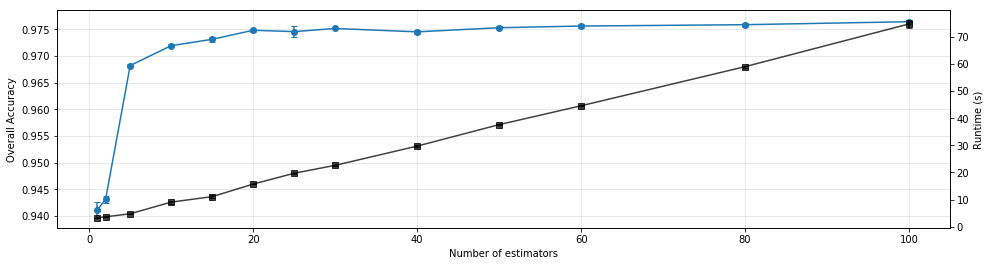

Accuracies: 0.941,  0.943,  0.968,  0.972,  0.973,  0.975,  0.975,  0.975,  0.975,  0.975,  0.976,  0.976,  0.976


In [11]:
parameter = 'n_estimators'
parameter_values = [1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 80, 100]
confs_1, run_times_1 = scan_parameter(parameter, parameter_values,
                                      kwargs={'n_jobs': -1, 'bootstrap': False},
                                      save_to_txt=True, redo=False)
plot_accuracies_and_runtime(parameter=parameter, alias='Number of estimators')

## Number of features per split decision

This parameter determines how many features are used to find the best split. If the individual features carry sufficient information to split classes well, increasing the number of splits will not improve the accuracy, however it will also not decrease it as the required number of features per split saturates.

Loading previously stored results


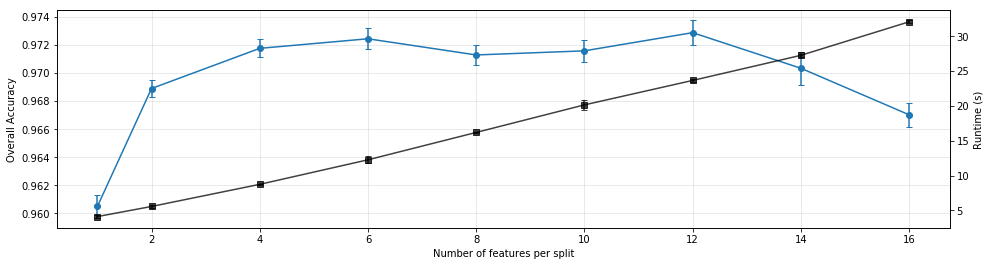

Accuracies: 0.960,  0.969,  0.972,  0.972,  0.971,  0.972,  0.973,  0.970,  0.967


In [12]:
parameter = 'max_features'
parameter_values = [1, 2, 4, 6, 8, 10, 12, 14, 16]
confs_2, run_times_2 = scan_parameter(parameter, parameter_values,
                       kwargs={'n_jobs': -1,  'bootstrap': False}, redo=False, save_to_txt=True)
plot_accuracies_and_runtime(parameter=parameter,  alias='Number of features per split')

## Maximum tree depth

The maximum tree depth sets a hard limit on when to stop growing the tree. Naturally, a decision tree stops growing when all the data has been split with minimum impurity. However, in case the data is noisy, this often leads to overfitting. Therefore, stopping the tree growth early on can mitigate this effect. However, 


Loading previously stored results


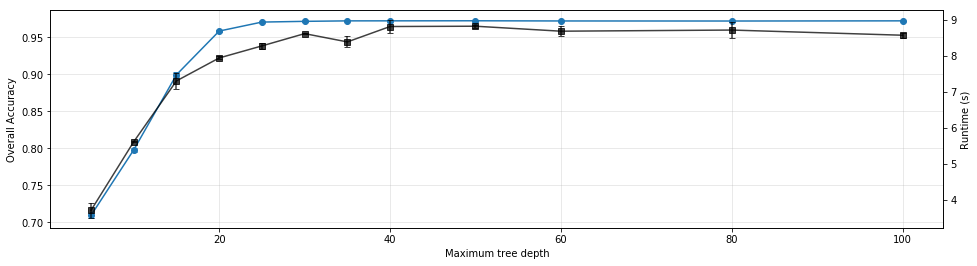

Accuracies: 0.709,  0.798,  0.899,  0.959,  0.971,  0.972,  0.972,  0.972,  0.972,  0.972,  0.972,  0.972


In [13]:
parameter = 'max_depth'
parameter_values = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 80, 100]
confs_3, run_times_3 = scan_parameter(parameter, parameter_values,
                       kwargs={'n_jobs': -1, 'bootstrap': False}, redo=False, save_to_txt=True)
plot_accuracies_and_runtime(parameter=parameter,  alias='Maximum tree depth')

## Minimum impurity decrease

This parameter sets a lower bound to the expected impurity decrease when going from one node to the next, and will therefore influence the split decision. However, if the best possible split cannot decrease the impurity by the specified amount, the tree stops growing. Here we find that any value larger than zero decreases the overall accuracy.

Loading previously stored results


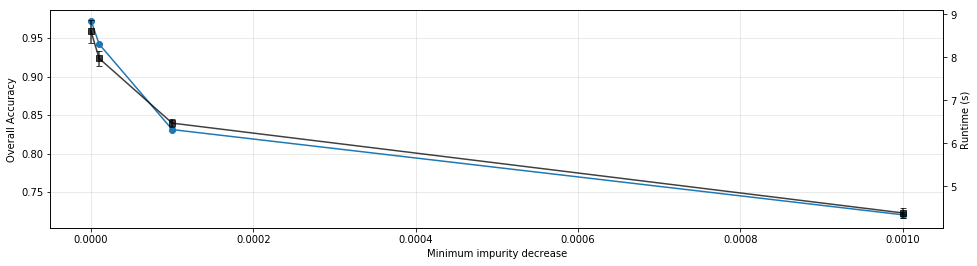

Accuracies: 0.973,  0.942,  0.831,  0.720


In [14]:
parameter = 'min_impurity_decrease'
parameter_values = [0, 1e-5, 1e-4, 1e-3]
confs_4, run_times_4 = scan_parameter(parameter, parameter_values,
                       kwargs={'n_jobs': -1, 'bootstrap': False},
                                      redo=False, save_to_txt=True)
plot_accuracies_and_runtime(parameter=parameter,  alias='Minimum impurity decrease')

## Minimum number of samples after splitting

When determining the best split, we can enforce that more than one sample results from the split in both decision paths. The resulting effect for any number larger than two is early stopping in the tree growth if the split can't be made without separating the samples to smaller subsets.

Loading previously stored results


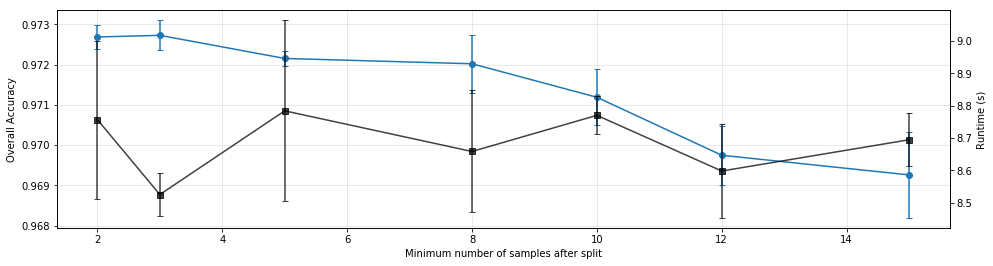

Accuracies: 0.973,  0.973,  0.972,  0.972,  0.971,  0.970,  0.969


In [15]:
parameter = 'min_samples_split'
parameter_values = [2, 3, 5, 8, 10, 12, 15]
confs_5, run_times_5 = scan_parameter(parameter, parameter_values,
                       kwargs={'n_jobs': -1, 'bootstrap': False},
                                      redo=False, save_to_txt=True)
plot_accuracies_and_runtime(parameter=parameter,  alias='Minimum number of samples after split')

## Minimum number of samples per leaf

Just as we can enforce a minimum number of samples to be left after each split, we can also enforce to have a minimum number of samples per leaf. As before, this will also result in early stopping: once the required number of samples has been achieved after a split, the following node will turn into a leaf regardless of whether the impurity has reached zero.

Loading previously stored results


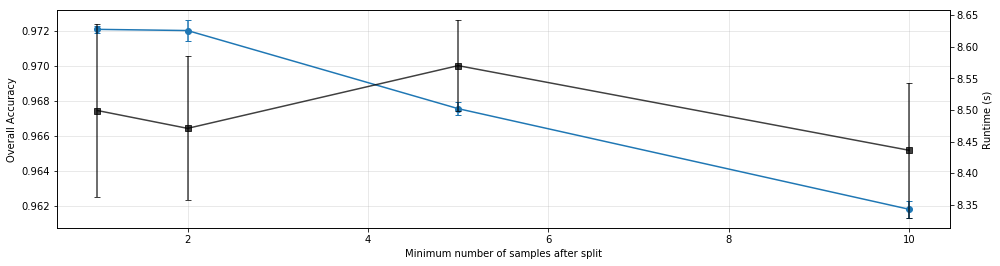

Accuracies: 0.972,  0.972,  0.968,  0.962


In [16]:
parameter = 'min_samples_leaf'
parameter_values = [1, 2, 5, 10]
confs_6, run_times_6 = scan_parameter(parameter, parameter_values,
                       kwargs={'n_jobs': -1, 'bootstrap': False},
                                      redo=False, save_to_txt=True)
plot_accuracies_and_runtime(parameter=parameter,  alias='Minimum number of samples after split')

## Final, optimised results for the Random Forest classifier

Overall, our analysis has shown that early stopping in tree growth in whatever form is detrimental to the classification accuracy, while increasing the number of estimators improves the accuracy until a threshold is reached. In terms of non-continuous parameter, we found that the Gini impurity as splitting criterion works best, and the classification accuracy is higher if no bootstrap aggregation on the training samples is performed.

Below, we run a ten-fold cross-validation using the tuned parameters for the Random Forest classifier and print out the final results.

In [17]:
tic = time.time()
cms, runtimes, clfs = c.cross_validate_classifier(
    RandomForestClassifier, features, labels, kfold=10,
    kwargs={'n_estimators': 70, 'n_jobs': -1, 'max_depth': 30, 'max_features': 5,
            'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2,
            'bootstrap': False, 'criterion': 'gini'})
toc = time.time() - tic
print('Ran the 10-fold cross-validation in {:.2f} s.'.format(toc))

Ran the 10-fold cross-validation in 1123.85 s.


In [18]:
cover_types = ['Spruce/fir', 'Lodgepole pine', 'Ponderosa pine', 'Cottonwood/willow', 'Aspen',
               'Douglas-fir', 'Krummholz']
_, _, _ = c.metrics_wrapper(
    np.mean(cms, axis=0), cover_types, runtime=np.mean(runtimes), do_display=True)

Average/overall metrics:


,Avg Runtime,Average F-Meas,Average Precision,Average Recall,Overall Accuracy
Class-Averaged or Overall:,112.383643,0.96,0.96,0.95,0.98


Class-specific metrics:


,Class,F-Meas,Precision,Recall
Confusion Matrix Index,,,,
0,Spruce/fir,0.98,0.98,0.97
1,Lodgepole pine,0.98,0.98,0.98
2,Ponderosa pine,0.97,0.97,0.98
3,Cottonwood/willow,0.91,0.93,0.9
4,Aspen,0.92,0.94,0.9
5,Douglas-fir,0.95,0.96,0.95
6,Krummholz,0.98,0.98,0.97


Confusion matrix (yellow = col max; blue = row max):


Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,20644.8,500.7,0.6,0,4.8,0.6,32.5
1,418,27821.6,27.6,0,41.6,16.5,5.7
2,0,28.8,3491.1,13.3,4,37.8,0
3,0,0,20.2,248.2,0,6.6,0
4,5.7,78.8,8,0,853.8,2.4,0.3
5,1,26.7,55.5,6.2,1.9,1645.7,0
6,53.6,7.6,0,0,0.6,0,1989.2


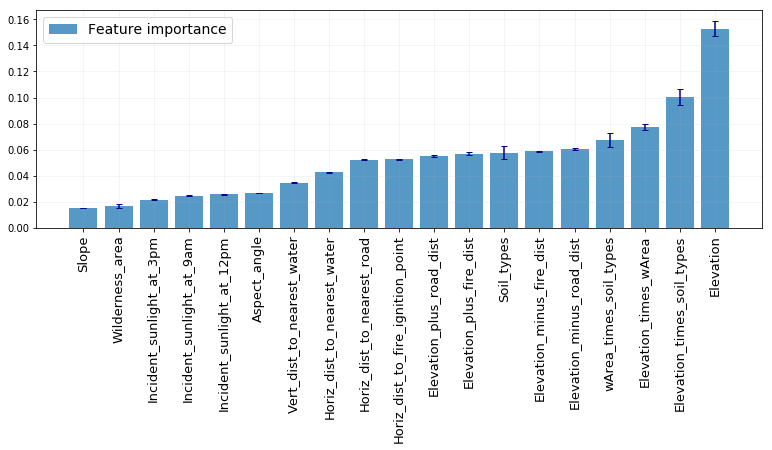

In [19]:
feature_names = list(data_new)
feature_importances = np.mean([clf.feature_importances_ for clf in clfs], axis=0)
feature_importances_stderr = np.std([clf.feature_importances_ for clf in clfs], axis=0)
sort_indices = np.argsort(feature_importances)
num_features = len(feature_importances)
x_axis = np.arange(num_features)
fig, ax = plt.subplots(figsize=(13, 4))
ax.bar(x_axis, feature_importances[sort_indices],
        yerr=feature_importances_stderr[sort_indices], capsize=3, alpha=0.75, ecolor='DarkBlue',
       label='Feature importance')
ax.set_xticks(x_axis)
feature_names = np.array(list(data_new))
ax.set_xticklabels(feature_names[sort_indices], fontsize=13, rotation=90)
ax.grid(True, ls='-', alpha=0.15)
ax.legend(fontsize=14)

plt.show()